In [1]:
import numpy as np

#transformedData = np.load('transformedData2.npy')
transformedData = np.load('X.npy')
# ages = np.array(np.load('ages.npy'),dtype='float64')
ages = np.load('ages2.npy')
sexes = np.load('sexes2.npy')
transformedData.shape, ages.dtype

((416, 100), dtype('float64'))

## Classic ML classifier

In [9]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split, StratifiedKFold
from sklearn.metrics import mean_squared_error

#X_train, X_test, y_train, y_test = train_test_split(transformedData, ages, test_size=0.2)
skf = StratifiedKFold(ages, n_folds=3)

best = 500, None
for i in range(50,500,15):
    vals = []
    for train_index, test_index in skf:
        X_train, X_test = transformedData[train_index], transformedData[test_index]
        y_train, y_test = ages[train_index], ages[test_index]
        #mod = LogisticRegression(n_jobs=-1)
        mod = GradientBoostingRegressor(n_estimators=i, max_depth=3)
        mod.fit(X_train, y_train)
        #y_out = np.array(mod.predict(X_test))
        # y_test = np.array(y_test, dtype='float64')
        score = mean_squared_error(np.array(y_test, dtype='float64'), np.array(mod.predict(X_test),dtype='float64'))
        #if score < best[0]: best = score,i 
        vals.append(score)
    print i,np.mean(vals)

#for i in range(0,y_test.shape[0]):
#    print mod.predict(X_test[i]), y_test[i]

50 106.250312802
65 104.530033592
80 104.410779199
95 103.981727011
110 102.967947606
125 103.240068672
140 103.050932291
155 103.055858463
170 103.320811262
185 102.771718971
200 103.350904089
215 103.282873237
230 103.00115722
245 103.257456487
260 102.936998749
275 103.092325906
290 103.076418432
305 103.585968207
320 103.205256306
335 103.120290977
350 103.277168089
365 103.167998423
380 103.447392511
395 103.107713127
410 103.034841123
425 103.332531827
440 103.247810042
455 103.404531784
470 103.248763672
485 103.21533797


| Components | Reducing Alg. | Num of cls | Max depth | Classifying Alg. | MSE |
|---|---|---|---|----|---|
|40 |PCA|185| 2 | Grad| 105|
|100|FA |185| 3 | Grad| 102|

## Neural Net

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor,KerasClassifier
from keras.layers.advanced_activations import ELU

from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler, LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import KFold,cross_val_score,train_test_split

# define base mode
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(transformedData.shape[1], input_dim=transformedData.shape[1], init='normal', activation=ELU(alpha=1.0)))
    model.add(Dropout(0.1))
    model.add(Dense(transformedData.shape[1]/2, init='normal', activation=ELU(alpha=1.0)))
    #model.add(Dense(25, init='normal', activation='relu'))
    #model.add(Dense(10, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model


#steps = []
#steps.append(('scale',StandardScaler()))
#steps.append(('neural_net', KerasRegressor(build_fn=baseline_model, nb_epoch=300, batch_size=50, verbose=0)))

# fix random seed for reproducibility
#seed = 13
#np.random.seed(seed)
#kfold = KFold(transformedData.shape[0],n_folds=8, random_state=seed)
#results = cross_val_score(Pipeline(steps), transformedData, ages, cv=kfold)
#print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

import matplotlib.pyplot as plt
%matplotlib inline

scaler = Normalizer().fit(transformedData)
X = scaler.transform(transformedData)
X_train, X_test, y_train, y_test = train_test_split(X, ages, test_size=0.1)
#X_train, X_test, y_train, y_test = train_test_split(X, LabelBinarizer().fit_transform(sexes), test_size=0.1)

model = KerasRegressor(build_fn=baseline_model, nb_epoch=100000, batch_size=5, verbose=0)
#model = KerasClassifier(build_fn=baseline_model, nb_epoch=80000, batch_size=500, verbose=0)
history = model.fit(X_train, y_train, validation_split=0.1, verbose=0)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Using TensorFlow backend.


24.1250495911 20
24.1272144318 81
24.1234340668 20
24.1252479553 21
24.1259174347 24
24.1273574829 84
24.1248855591 21
24.123167038 23
24.1269435883 76
24.1273670197 48
24.1223602295 23
24.1232509613 19
24.1209564209 21
24.1234951019 23
24.1254253387 41
24.1269130707 74
24.1272830963 66
24.1274280548 65
24.1264572144 29
24.1270751953 87
24.1273975372 96
24.1257266998 23
24.1231918335 24
24.1271724701 58
24.1271762848 68
24.1269569397 46
24.1235313416 25
24.1275043488 75
24.1273918152 80
24.1217956543 25
24.1272125244 81
24.1272525787 74
24.1238937378 18
24.1229972839 23
24.1269874573 86
24.1249599457 22
24.1213474274 20
24.1240673065 38
24.1220302582 21
24.127412796 73
24.1231861115 24
24.1263637543 26
24.1254711151 30
24.1248950958 22
24.1273937225 89
24.1270999908 90
24.1226348877 21
24.1273326874 78
24.1231994629 23
24.1272335052 84
24.1271839142 80
24.1274719238 83
24.1223106384 20
24.1225910187 20
24.1274452209 72
24.1273899078 75
24.1274700165 70
24.1233787537 22
24.1250705719 21

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

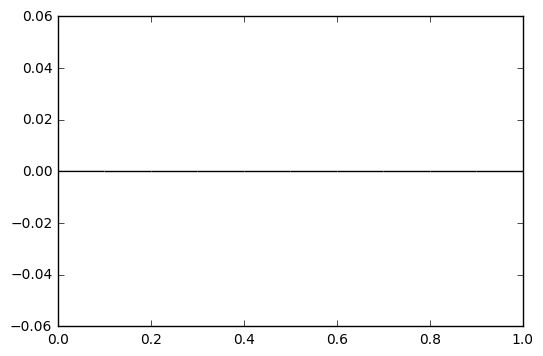

In [49]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer

#X_train, X_test, y_train, y_test = train_test_split(transformedData[sexes!='Male'], ages[sexes!='Male'], test_size=0.2)
#scaler = Normalizer().fit(transformedData)
#X = scaler.transform(transformedData)

X_train, X_test, y_train, y_test = train_test_split(X, ages, test_size=0.2)

#model = KerasRegressor(build_fn=baseline_model, nb_epoch=800, batch_size=50, verbose=0)
#history = model.fit(X_train, y_train, validation_split=0.15, verbose=0)
errors = []
for i in range(0,y_test.shape[0]):
    #errors.append(history.model.predict(X_test[i].reshape(1,25)) - float(y_test[i]))
    print model.predict(X_test[i].reshape(1,25)), y_test[i]
plt.hist(errors)

In [44]:
#print sum(sexes=='Male'), sum(sexes!='Male')
#plt.hist(np.array(ages, dtype='int16'))
history.__dict__.keys()

['model', 'params', 'epoch', 'history']

In [45]:
y_test.dtype

dtype('<U2')